In [10]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
img = cv2.imread('Celebrity2/Megan Fox/020_467a9bd7.jpg')
img.shape

(474, 474, 3)

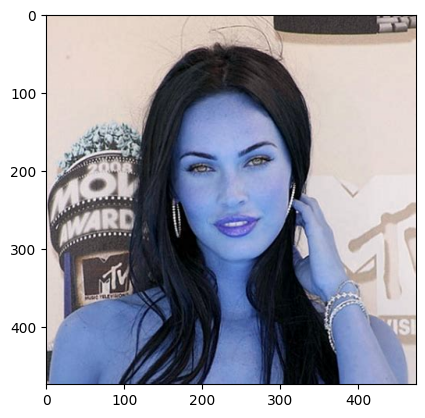

In [12]:
plt.imshow(img)

In [13]:
img.shape

(474, 474, 3)

(474, 474)

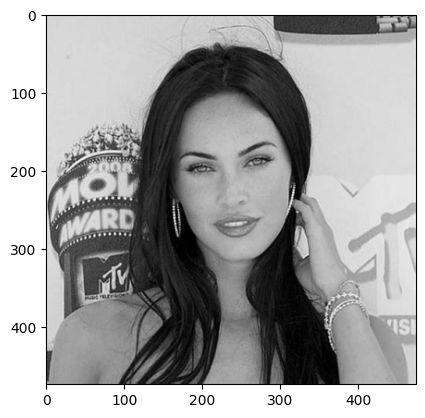

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

In [15]:
#pake code dari opencv untuk deteksi fitur wajah
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[144, 120, 191, 191]], dtype=int32)

In [16]:
(x, y, w, h) = faces[0]
x,y,w,h

(np.int32(144), np.int32(120), np.int32(191), np.int32(191))

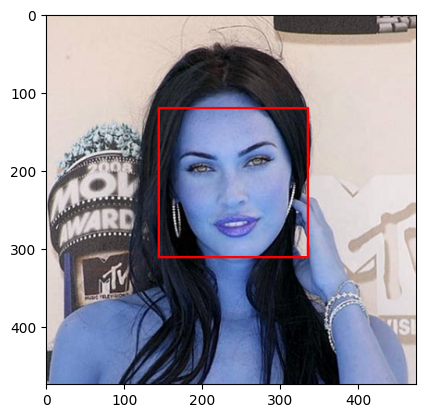

In [17]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0, 0), 2)
plt.imshow(face_img)

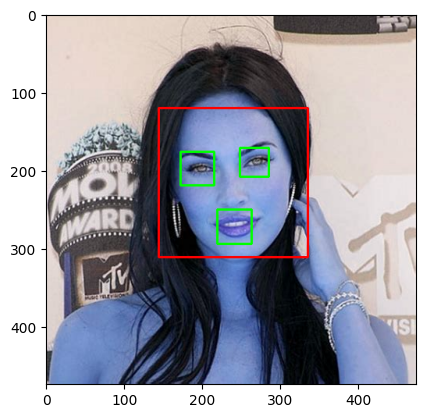

In [18]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"❗ Gagal baca gambar: {image_path}")
        return None

    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except Exception as e:
        print(f"❗ Error saat convert warna: {image_path}")
        print(e)
        return None

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_color = img[y:y+h, x:x+w]
        # lanjut misal mau return roi
        return roi_color

    return None

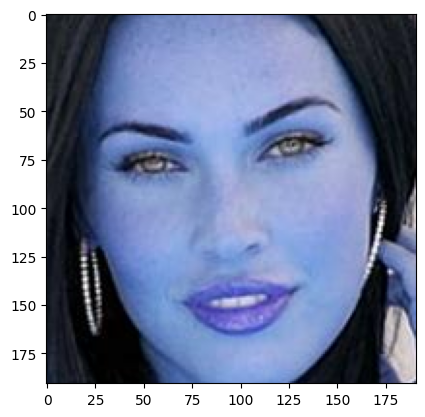

In [20]:
cropped_image = get_cropped_image_if_2_eyes('Celebrity2/Megan Fox/020_467a9bd7.jpg')
plt.imshow(cropped_image)

In [21]:
path_to_data = "Celebrity2/"
path_to_cr_data = "Celebrity_cropped2/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['Celebrity2/Robert Downey Jr',
 'Celebrity2/Jennifer Lawrence',
 'Celebrity2/Tom Cruise',
 'Celebrity2/Angelina Jolie',
 'Celebrity2/Johnny Depp',
 'Celebrity2/Tom Hanks',
 'Celebrity2/Scarlett Johansson',
 'Celebrity2/Will Smith',
 'Celebrity2/Nicole Kidman',
 'Celebrity2/Megan Fox']

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
cropped_image_dirs = []
actress_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    actress_name = img_dir.split('/')[-1]
    print(f"\n🔵 Memproses folder: {actress_name}")

    actress_file_names_dict[actress_name] = []

    for entry in os.scandir(img_dir):
        # Cek hanya file gambar
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, actress_name)

                # Cek dan buat folder crop
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"✅ Membuat folder crop: {cropped_folder}")

                # Simpan hasil crop
                cropped_file_name = f"{actress_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                actress_file_names_dict[actress_name].append(cropped_file_path)

                print(f"✔️ Menyimpan: {cropped_file_path}")

                count += 1
            else:
                print(f"⚠️ Tidak ditemukan 2 mata di gambar: {entry.path}")
        else:
            print(f"❗ Skip file bukan gambar: {entry.path}")


🔵 Memproses folder: Robert Downey Jr
✅ Membuat folder crop: Celebrity_cropped2/Robert Downey Jr
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr1.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr2.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr3.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr4.png
⚠️ Tidak ditemukan 2 mata di gambar: Celebrity2/Robert Downey Jr/008_79cd0b7b.jpg
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr5.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr6.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr7.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr8.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr9.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr10.png
✔️ Menyimpan: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr11.png
✔️ Menyimpan: Celebrity_cro

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

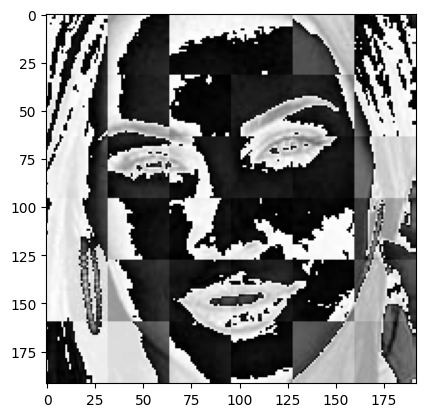

In [27]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [28]:
actress_file_names_dict

{'Robert Downey Jr': ['Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr1.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr2.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr3.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr4.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr5.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr6.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr7.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr8.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr9.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr10.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr11.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr12.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr13.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr14.png',
  'Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr15.png',
  'Celebrity_cropped2/Robert 

In [29]:
class_dict = {}
count = 0
for actress_name in actress_file_names_dict.keys():
    class_dict[actress_name] = count
    count = count + 1
class_dict

{'Robert Downey Jr': 0,
 'Jennifer Lawrence': 1,
 'Tom Cruise': 2,
 'Angelina Jolie': 3,
 'Johnny Depp': 4,
 'Tom Hanks': 5,
 'Scarlett Johansson': 6,
 'Will Smith': 7,
 'Nicole Kidman': 8,
 'Megan Fox': 9}

In [31]:
X = []
y = []
for actress_name, training_files in actress_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            print(f"⚠️ Failed to read: {training_image}")
            continue  # skip file rusak atau path salah

        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        
        combined_img = np.vstack((
            scalled_raw_img.reshape(32*32*3, 1),
            scalled_img_har.reshape(32*32, 1)
        ))

        X.append(combined_img)
        y.append(class_dict[actress_name])

⚠️ Failed to read: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr1.png
⚠️ Failed to read: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr19.png
⚠️ Failed to read: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr58.png
⚠️ Failed to read: Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr70.png


[ WARN:0@144.258] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr1.png'): can't open/read file: check file path/integrity
[ WARN:0@144.319] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr19.png'): can't open/read file: check file path/integrity
[ WARN:0@144.407] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr58.png'): can't open/read file: check file path/integrity
[ WARN:0@144.443] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Robert Downey Jr/Robert Downey Jr70.png'): can't open/read file: check file path/integrity


⚠️ Failed to read: Celebrity_cropped2/Jennifer Lawrence/Jennifer Lawrence26.png
⚠️ Failed to read: Celebrity_cropped2/Jennifer Lawrence/Jennifer Lawrence32.png
⚠️ Failed to read: Celebrity_cropped2/Jennifer Lawrence/Jennifer Lawrence74.png


[ WARN:0@144.527] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Jennifer Lawrence/Jennifer Lawrence26.png'): can't open/read file: check file path/integrity
[ WARN:0@144.533] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Jennifer Lawrence/Jennifer Lawrence32.png'): can't open/read file: check file path/integrity
[ WARN:0@144.609] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Jennifer Lawrence/Jennifer Lawrence74.png'): can't open/read file: check file path/integrity


⚠️ Failed to read: Celebrity_cropped2/Angelina Jolie/Angelina Jolie18.png
⚠️ Failed to read: Celebrity_cropped2/Angelina Jolie/Angelina Jolie33.png
⚠️ Failed to read: Celebrity_cropped2/Johnny Depp/Johnny Depp28.png


[ WARN:0@144.887] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Angelina Jolie/Angelina Jolie18.png'): can't open/read file: check file path/integrity
[ WARN:0@144.912] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Angelina Jolie/Angelina Jolie33.png'): can't open/read file: check file path/integrity
[ WARN:0@145.087] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Johnny Depp/Johnny Depp28.png'): can't open/read file: check file path/integrity


⚠️ Failed to read: Celebrity_cropped2/Tom Hanks/Tom Hanks56.png
⚠️ Failed to read: Celebrity_cropped2/Tom Hanks/Tom Hanks87.png


[ WARN:0@145.310] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Tom Hanks/Tom Hanks56.png'): can't open/read file: check file path/integrity
[ WARN:0@145.359] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Tom Hanks/Tom Hanks87.png'): can't open/read file: check file path/integrity


⚠️ Failed to read: Celebrity_cropped2/Will Smith/Will Smith1.png
⚠️ Failed to read: Celebrity_cropped2/Will Smith/Will Smith2.png
⚠️ Failed to read: Celebrity_cropped2/Will Smith/Will Smith55.png


[ WARN:0@145.655] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Will Smith/Will Smith1.png'): can't open/read file: check file path/integrity
[ WARN:0@145.655] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Will Smith/Will Smith2.png'): can't open/read file: check file path/integrity
[ WARN:0@145.739] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Will Smith/Will Smith55.png'): can't open/read file: check file path/integrity


⚠️ Failed to read: Celebrity_cropped2/Nicole Kidman/Nicole Kidman77.png


[ WARN:0@145.875] global loadsave.cpp:268 findDecoder imread_('Celebrity_cropped2/Nicole Kidman/Nicole Kidman77.png'): can't open/read file: check file path/integrity


In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(977, 4096)

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6816326530612244

In [35]:
len(X_test)

245

In [36]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.57      0.87      0.68        15
           2       0.81      0.71      0.76        24
           3       0.58      0.54      0.56        26
           4       0.67      0.48      0.56        25
           5       0.70      0.73      0.71        22
           6       0.71      0.91      0.80        43
           7       0.63      0.60      0.62        20
           8       0.79      0.52      0.63        21
           9       0.77      0.74      0.75        27

    accuracy                           0.68       245
   macro avg       0.68      0.67      0.67       245
weighted avg       0.69      0.68      0.68       245



In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/ladyakalascha/jupyter-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ladyakalascha/jupyter-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ladyakalascha/jupyter-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ladyakalascha/jupyter-env/lib/python3.12/site-packages/sklearn/linear_mo

,model,best_score,best_params
0,svm,0.711704,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.465791,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.700895,{'logisticregression__C': 1}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [48]:
best_estimators['svm'].score(X_test, y_test)

0.6816326530612244

In [49]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6816326530612244

In [50]:
best_estimators['random_forest'].score(X_test, y_test)

0.44081632653061226

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[10,  3,  3,  0,  0,  1,  1,  4,  0,  0],
       [ 0, 11,  0,  1,  0,  0,  1,  0,  2,  0],
       [ 3,  0, 18,  1,  0,  1,  0,  1,  0,  0],
       [ 1,  5,  0, 14,  1,  0,  1,  0,  1,  3],
       [ 3,  3,  1,  2, 13,  3,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0, 16,  2,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  1, 39,  0,  1,  0],
       [ 1,  2,  0,  0,  3,  2,  1, 11,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  3,  0, 14,  0],
       [ 0,  0,  0,  5,  0,  0,  1,  0,  0, 21]])

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'celebrity_model.pkl') 

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))
